# Cómo se hizo el logo de Python Canarias (Spoiler: con Python)

## Usamos Pillow para trabajar con imágenes

La librería [Pillow](https://python-pillow.org/) es una librería Python que nos permite 
trabajar fácilmente con imagenes, en muchos formatos diferentes. Su uso es 
bastante sencillo. Por ejemplo, para trabajar con una imagen PNG ya existente, 
podemos usar un objeto de tipo `Image` y el método de clase `open`.

Veamos primero si tenemos instalada la librería Pillow:

In [3]:
# Veamos primero si Pillow está instalado, ejecutando esta celda
import PIL

Si la línea anterior no da problemas, es que Pillow está correctamente instalado. Vamos a empezar con lo más básico, carguemos una imagen y juguemos un poco con ella:

In [4]:
# Ok, PIL está instalado
from PIL import Image
im = Image.open('./carteleria/logo.png')

Bien, en la variable `im` tenemos la imagen cargada. No hace falta que especifiquemos el tipo de imagen que es, porque Pillow puede inferirlo de la extensión del nombre del archivo.

Podemos hacer que el notebook
nos muestre la imagen simplemente incluyéndola en una celda. iPython devuelve el 
resultado de la expresión y Jupyer es lo suficientemente inteligente como para saber que 
el resultado es una imagen, y como tal nos la muestra:

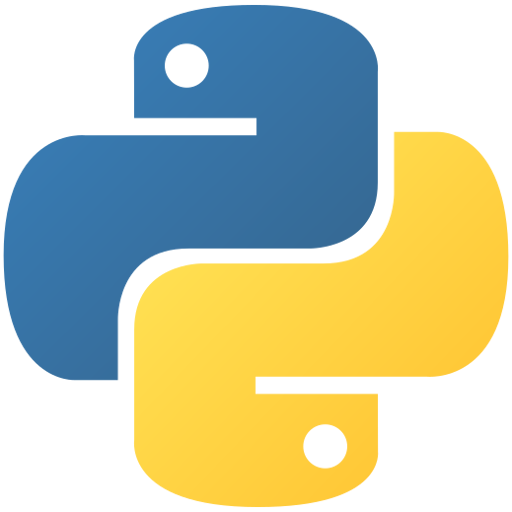

In [5]:
im

Con el objeto imagen podemos hacer muchisimas cosas. Usando el métido `thumbnail`, por ejemplo, podemos escalar la imagen y obtener una versión limitada al tamaño que deseemos. por ejemplo, la imagen ahora mismo es bastante grande. Para saber cuanto podemos leer la propiedad `size`:

In [6]:
im.size

(512, 512)

Si quisieramos escalar a un tamaño de `64x64` pixels, por ejemplo, usaríamos el mencionado 
método `thumbnail`. Este método espera como mínimo un parámetro, una dupla en la que
indicamos las dimensiones máximas deseadas en los ejes X e Y:

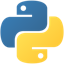

In [7]:
new_size = (64, 64)
im.thumbnail(new_size)
im

El método `thumbnail` modifica la propia image; esto no es lo habitual. Por 
lo general, los métodos en Pillow no modifican la imagen sino 
que nos devuelven una imagen nueva, dejando la anterior intacta. Por ejemplo, podemos
recortar una parte de la imagen con el método `crop`. 

Carguemos de nuevo la imagen y recortemos la esquina inferior derecha. el único 
parámetro obligatorio que necesita crop es una cuadrupla con las dimensiones de 
la esquina superior izquierda y la esquina inferior derecha del área a recortar:

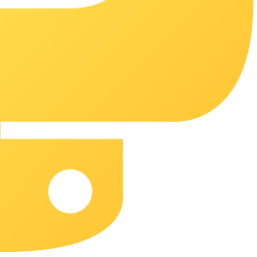

In [8]:
im = Image.open('./carteleria/logo.png')
assert im.size == (512, 512)
box = (255, 255, 512, 512)
esquina = im.crop(box)
esquina

Para hacer el icono vamos a dividir la imagen en bloques de 32x32; como la imagen 
original es de 512x512, tendremos 16x16 bloques. 

Obtener el primer bloque es tan sencillo como:

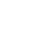

In [9]:
b = im.crop((0,0,32,32))
b

Es muy aburrido porque la esquina es completamente transparente y no se ve nada.

Para obtener, por ejemplo, el bloque en la columna 5, fila 8, haríamos:

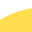

In [10]:
col = 5
fila = 8
box = (col*32, fila*32, col*32+32, fila*32+32)
b35 = im.crop(box)
b35

Vamos a hacer un pequeño *hack* rápido para poder representar todos los bloques con los
que vamos a trabajar, primero una función `show_image` para poder visualizar cada
uno de los bloques:


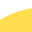

In [14]:
from io import BytesIO
from base64 import b64encode
from IPython.display import display, HTML

def show_image(im):
    buff = BytesIO()
    im.save(buff, format='png')
    return (
        "<img src='data:image/png;base64,{0}'/>"
        .format(b64encode(buff.getvalue())
        .decode('utf-8'))
        )
    
display(HTML(show_image(b35)))

Vamos a mostrar en una tabla HTML cada uno de los bloques. Para ello hagamos una función que nos devuelva el bloque simplemente pasándole fila y columna. Recuerda que el bloque en la fila 1, columna 1 empieza en (0,0) y acaba en (32,32):

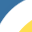

In [13]:
def get_bloque(col, fila):
    x1, y1 = (col - 1) * 32, (fila - 1) * 32
    x2, y2 = x1 + 32, y1 +32
    box = (x1, y1, x2, y2)
    return im.crop(box)
b = get_bloque(5, 9)
b

Ahora, usando esta función, podemos crear la tabla que muestre la imagen original,
troceada según queremos:


,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,

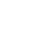
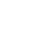
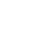
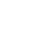
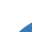
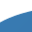
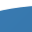
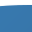
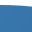
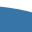
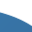
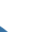
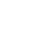
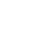
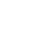
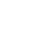
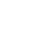
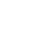
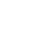
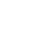
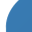
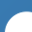
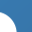
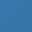
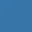
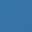
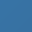
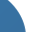
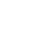
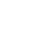
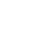
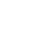
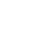
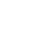
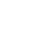
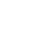
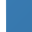
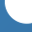
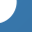
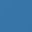
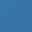
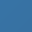
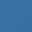
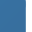
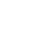
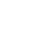
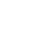
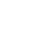
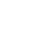
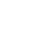
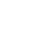
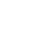
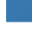
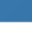
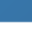
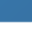
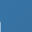
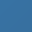
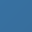
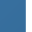
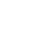
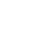
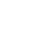
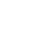
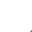
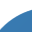
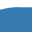
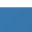
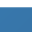
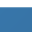
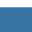
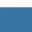
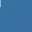
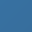
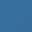
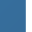
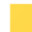
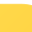
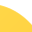
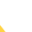
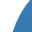
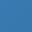
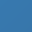
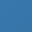
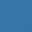
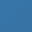
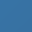
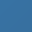
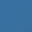
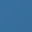
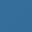
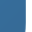
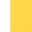
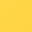
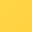
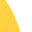
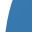
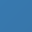
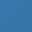
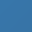
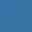
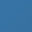
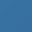
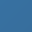
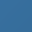
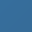
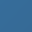
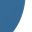
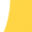
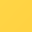
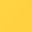
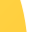
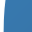
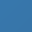
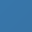
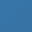
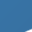
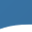
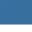
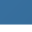
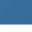
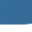
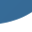
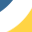
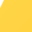
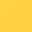
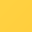
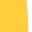
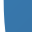
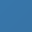
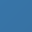
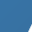
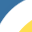
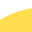
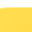
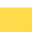
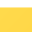
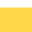
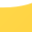
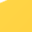
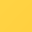
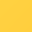
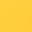
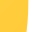
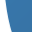
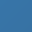
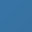
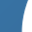
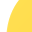
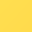
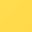
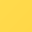
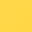
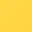
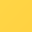
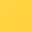
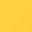
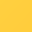
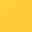
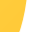
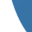
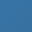
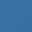
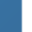
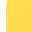
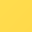
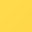
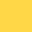
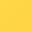
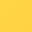
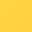
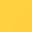
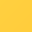
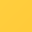
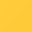
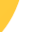
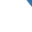
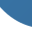
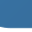
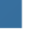
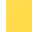
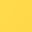
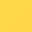
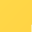
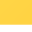
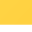
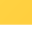
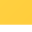
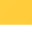
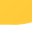
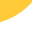
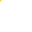
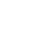
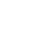
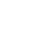
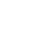
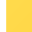
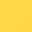
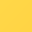
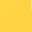
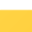
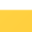
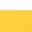
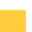
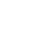
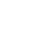
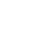
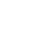
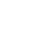
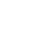
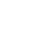
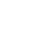
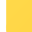
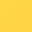
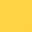
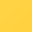
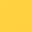
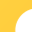
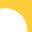
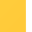
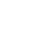
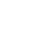
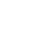
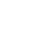
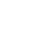
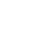
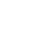
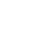
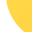
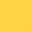
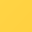
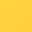
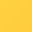
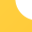
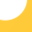
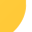
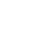
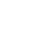
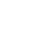
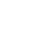
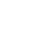
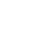
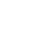
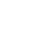
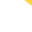
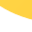
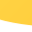
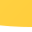
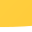
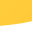
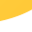
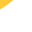
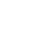
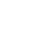
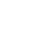
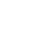

In [15]:
buff = ['<table>']
for fila in range(1, 17):
    buff.append('<tr>')
    for columna in range(1, 17):
        block = get_bloque(columna, fila)
        buff.append('<td>{}</td>'.format(show_image(block)))
    buff.append('</tr>')
buff.append('</table>')
display(HTML('\n'.join(buff)))
        

## Trabajando con colores

La idea ahora es calcular los valores medios de los colores de cada bloque. Los colores se
almacen como cuadruplas, con los valores rojo, verde, azul y *alpha* o transparencia. Podemos 
obtener estos valores como una lista de cuadruplas con el método `getdata`, que nos devolverá
un iterador con el que obtendremos cada uno de los valores, por ejemplo, vamos a ver los valores del bloque situado en la columna 5, fila 9:

In [25]:
b = get_bloque(5, 9)
# solo mostraremos los primeros valores, a modo de ejemplo
for i, rgba in enumerate(b.getdata()):
    print(rgba)
    if i > 28:
        print('etc...')
        break

(55, 114, 164, 255)
(55, 114, 163, 255)
(55, 114, 163, 255)
(55, 114, 163, 255)
(55, 114, 163, 255)
(55, 114, 163, 255)
(55, 114, 163, 255)
(55, 114, 163, 255)
(55, 114, 163, 255)
(55, 114, 163, 255)
(55, 114, 163, 255)
(55, 114, 163, 255)
(55, 114, 163, 255)
(55, 114, 163, 255)
(55, 113, 163, 255)
(55, 113, 162, 255)
(55, 113, 162, 255)
(55, 113, 162, 255)
(55, 113, 162, 255)
(55, 113, 162, 255)
(55, 113, 162, 255)
(55, 113, 162, 255)
(55, 113, 162, 243)
(55, 113, 162, 167)
(56, 114, 163, 95)
(53, 115, 162, 26)
(0, 0, 0, 0)
(0, 0, 0, 0)
(0, 0, 0, 0)
(43, 128, 170, 0)
etc...


Podemos calcular los valores medios de rojo, verde
y azul de todos estos [pixels](https://es.wikipedia.org/wiki/P%C3%ADxel), 
obteniendo así un nuevo color que será la media de todos los colores
del bloque:

In [18]:
colores = list(b.getdata())  # convertimos el iterador en una lista
rojo_medio = sum([t[0] for t in colores]) / 1024  # 32x32 pixeles en el bloque
verde_medio = sum([t[1] for t in colores]) / 1024  # 32x32 pixeles en el bloque
azul_medio = sum([t[2] for t in colores]) / 1024  # 32x32 pixeles en el bloque

print('Valor rojo medio [0..255]: {}'.format(rojo_medio))
print('Valor verde medio [0..255]: {}'.format(verde_medio))
print('Valor azul medio [0..255]: {}'.format(azul_medio))

Valor rojo medio [0..255]: 44.587890625
Valor verde medio [0..255]: 58.4970703125
Valor azul medio [0..255]: 57.7490234375


Los colores deberían ser enteros en el rango [0..255], así que los redondeamos con la función `round` y los convertimos a
enteros con `int`:
    
    

In [21]:
rojo_medio = int(round(rojo_medio))
verde_medio = int(round(verde_medio))
azul_medio = int(round(azul_medio))

print('Valor rojo medio [0..255]: {}'.format(rojo_medio))
print('Valor verde medio [0..255]: {}'.format(verde_medio))
print('Valor azul medio [0..255]: {}'.format(azul_medio))

Valor rojo medio [0..255]: 45
Valor verde medio [0..255]: 58
Valor azul medio [0..255]: 58


El color obtenido podemos mostrarlo escribiendo una función que nos pase de valores
`r`, `g` y `b` a la expresión en hexadecimal usada para los colores en Html. Esta función
podría ser así:

In [22]:
def color_as_hex(r, g, b):
    return '#{:02X}{:02X}{:02X}'.format(r, g, b)

assert color_as_hex(0,0,0) == '#000000'
assert color_as_hex(255,255,255) == '#FFFFFF'
assert color_as_hex(51,102,153) == '#336699'

hex_color = color_as_hex(rojo_medio, verde_medio, azul_medio)
display(HTML(
    '<div style="width:424px; height: 22px; color: silver; background-color: {0};">'
    '{0}'
    '</div>'.format(hex_color)
    ))

Podemos hacer ahora una función que nos de, a partir de una imagen, el color medio en formato RGB:

In [23]:
def get_color_medio(im):
    colores = list(im.getdata())  # convertimos el iterador en una lista
    return (
        int(round( sum([t[0] for t in colores]) / 1024 )),
        int(round( sum([t[1] for t in colores]) / 1024 )),
        int(round( sum([t[2] for t in colores]) / 1024 )),
        )
b = get_bloque(5, 9)
print(get_color_medio(b))

(45, 58, 58)


## Colores y luminosidad

La idea ahora es obtener, a partir de los componentes RGB, lo 
*luminoso* que es el color medio de cada
bloque, y crar una nueva imagen vectorial, en la que sustituimos cada bloque por un círculo, siendo el radio de cada círculo proporcional a la
luminosidad del color.

Hay varias formas de calcular la luminosidad, usaremos la descrita en el enlace inferior. Sean $r$, $g$ y $b$ los valores digitales de rojo, azul y verde, la luminosidad (o Luma, generalmente representada con la letra Y) corespondiente sería:


 $$ Y = 0.2899 \times r + 0.587 \times g + 0.114 \times b $$

Nota: La fórmula se puede consultar en <https://es.wikipedia.org/wiki/Luma_(vídeo)>

Fácilmente implementable en Python, preparada para usarse con valores en el rango 0..255 en vez de 0..1:

In [24]:
def get_luma(r, g, b):
    return (0.299 * r + 0.587 * g + 0.114 *b) / 255.
 

Vemos que la luminosidad del color negro (r = g = b = 0) es 0, 
la del color blanco (r = g = b = 255) es 1, y que
la luminosidad del valor que calculamos para el bloque de la columna 5, fila 9 está sobre 0.2, es decir, bastante oscuro:

In [265]:
print('Negro:', get_luma(0, 0, 0))
print('Blanco:', get_luma(255, 255, 255))
print('Negro:', get_luma(rojo_medio, verde_medio, azul_medio))


Negro: 0.0
Blanco: 1.0
Negro: 0.2122078431372549


**Nota offtopic**: Sale un color tan oscuro porque, al no estar considerando el cuarto valor, 
alfa, los valores transparentes, representados con
la tupla (0, 0, 0, 0) se consideran como negros opacos, es decir (0, 0, 0). 
Para nuestros intereses -en este momento- no tiene
mayor importancia, porque solo nos interesan las
diferencias en la luminosidad en términos relativos 
entre los distintos bloques, pero en otros casos 
tendríamos que hacer una media ponderada segun el valor 
alfa: A mayor valor alfa, mayor es la importancia 
de este color a la hora de mezclarse con otro, y más debería aportar a la media final.

## El formato SVG (Scalable Vector Graphic)

Ahora que podemos obtener este valor, podemos crear un documento 
vectorial en [formato SVG](https://es.wikipedia.org/wiki/Scalable_Vector_Graphics)
con los bloques sustituidos por círculos. Es muy fácil crear un fichero SVG, porque es
simplemente un fichero en XML: solo hay que abrir un editor gráfico, como 
[Inkscape](https://inkscape.org/es/), crear un documento nuevo y guardarlo; ya
tenemos una plantila para generar nuestros propios ficheros SVG.

Para el caso, he cogido el fichero y a partir de él he crado dos 
funciones triviales, `svg_begin` y `svg_end`, que 
simplemente devuelven el XML inicial y final del documento: Ahora puedo crear un documento
SVG simplemente incluyendo los elementos que desee como tag SVG en medio de las
dos llamadas a las funciones.

Veamos ese código:

In [2]:
def svg_begin(width=500, height=500):
    return '''<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!-- Created with Inkscape (http://www.inkscape.org/) -->

<svg
   xmlns:dc="http://purl.org/dc/elements/1.1/"
   xmlns:cc="http://creativecommons.org/ns#"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:svg="http://www.w3.org/2000/svg"
   xmlns="http://www.w3.org/2000/svg"
   xmlns:sodipodi="http://sodipodi.sourceforge.net/DTD/sodipodi-0.dtd"
   xmlns:inkscape="http://www.inkscape.org/namespaces/inkscape"
   width="{w}"
   height="{h}"
   viewBox="0 0 {w} {h}"
   id="svg4235"
   version="1.1"
   inkscape:version="0.91 r13725"
   sodipodi:docname="drawing.svg">
  <defs
     id="defs4237" />
  <sodipodi:namedview
     id="base"
     pagecolor="#ffffff"
     bordercolor="#666666"
     borderopacity="1.0"
     inkscape:pageopacity="0.0"
     inkscape:pageshadow="2"
     inkscape:zoom="0.175"
     inkscape:cx="1057.9563"
     inkscape:cy="381.52339"
     inkscape:document-units="px"
     inkscape:current-layer="layer1"
     showgrid="false"
     inkscape:window-width="1280"
     inkscape:window-height="971"
     inkscape:window-x="0"
     inkscape:window-y="0"
     inkscape:window-maximized="1" />
  <metadata
     id="metadata4240">
    <rdf:RDF>
      <cc:Work
         rdf:about="">
        <dc:format>image/svg+xml</dc:format>
        <dc:type
           rdf:resource="http://purl.org/dc/dcmitype/StillImage" />
        <dc:title></dc:title>
      </cc:Work>
    </rdf:RDF>
  </metadata>
  <g
     inkscape:label="Capa 1"
     inkscape:groupmode="layer"
     id="layer1"
     >'''.format(
        w=width,
        h=height,
        )

def svg_end():
    return '''
    </g>
</svg>
'''

Más simple que el mecanismo de un chupete. Ni siquiera me he molestado en
eliminar el comentario al principio que indica que el fichero fue creado por
Inkscape `<!-- Created with Inkscape (http://www.inkscape.org/) -->`; después de todo, es verdad. Solo cambié las dimensiones del documento, que originalmente era un A4, para poder especificarlas como parámetros opcionales y que 
coincidieran con la imagen original, $512 \times 512$.

Vamos a ver si funciona: vamos a realizar un fichero SVG nuevo, incluyendo simplemente un par de rectángulos por algún lado. He sacado los ejemplos del rectángulo de la página [Basic SVG Shapes](https://developer.mozilla.org/en-US/docs/Web/SVG/Tutorial/Basic_Shapes):

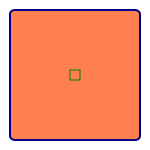

In [28]:
from IPython.display import display_svg

buff = [
    svg_begin(width=150, height=150),
    '<rect x="10px" y="10px" rx="5" ry="4" width="130px" height="130px" stroke="navy" fill="coral" stroke-width="2"/>',
    '<rect x="70" y="70" rx="0" ry="0" width="10" height="10" stroke="green" fill="transparent" stroke-width="1"/>',
    svg_end(),
    ]

display_svg(''.join(buff), raw=True)

Ya lo tenemos casi todo, solo nos falta saber cómo representa SVG un círculo. Lo más fácil es
verlo con un ejemplo:

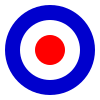

In [13]:
from IPython.display import display_svg

buff = [
    svg_begin(width=100, height=100),
    '<circle cx="50" cy="50" r="45" stroke="transparent" fill="MediumBlue" />',
    '<circle cx="50" cy="50" r="30" stroke="transparent" fill="white" />',
    '<circle cx="50" cy="50" r="15" stroke="transparent" fill="red" />',
    svg_end(),
    ]

display_svg(''.join(buff), raw=True)

> **Ejercicio**: El orden en que se encuentran 
  los elementos SVG dentro del fichero tiene su importancia. ¿Qué crees
  que pasaría si en vez de pintar primero el círculo azul, luego el
  blanco y finalmente el rojo, lo hicieramos a la inversa: primero el
  rojo, luego el blanco y luego el azul?

Ahora ya tenemos todas las piezas listas:

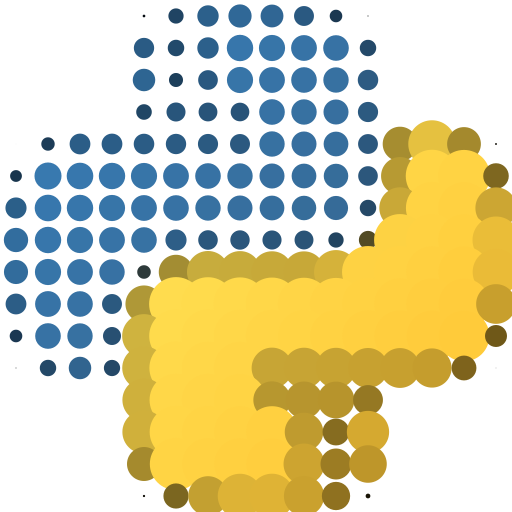

In [268]:
## calculamos los valores medios de cada bloque de 32x32 pixels
buff = [svg_begin(512, 512)]
for fila in range(1, 17):
    for columna in range(1, 17):
        bloque = get_bloque(columna, fila)
        (r, g, b) =  get_color_medio(bloque)
        luma = get_luma(r, g ,b)
        cx = (columna - 1) * 32 + 16
        cy = (fila - 1) * 32 + 16
        buff.append(
            '<circle cx="{cx}" cy="{cy}" r="{r}" stroke="transparent" fill="{color}" />'.format(
                cx=cx,
                cy=cy,
                r=luma*32,
                color=color_as_hex(r, g, b)
            ))
buff.append(svg_end())
display_svg(''.join(buff), raw=True)        

Tenemos un problema. Los círculos amarillos son mayores que los azules,
esto se debe a que la luminosidad del color amarillo es mayor que la del azul.

Esto se puede resolver de diversas maneras. Una de las más desvergonzadas e intelectualmente pobres sería modificar la función `get_luma` y cambiar los parámetros a mano hasta que obtengamos círculos de tamaños similares. Lo sé porque es exactamente lo que hice:

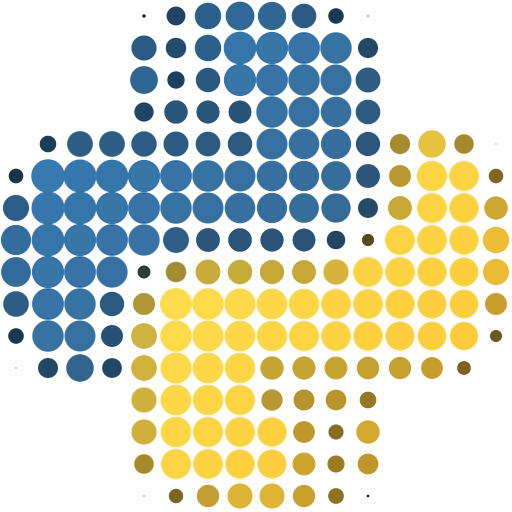

In [29]:
def get_luma(r, g, b):
    # return (0.299 * r + 0.587 * g + 0.114 *b) / 256.
    return ( (0.228-0.035) * r + (0.228-0.035) * g + (0.594 + 0.07) *b ) / (256 + 32)
    # Shame on you!


buff = [svg_begin(512, 512)]
for fila in range(1, 17):
    for columna in range(1, 17):
        bloque = get_bloque(columna, fila)
        (r, g, b) =  get_color_medio(bloque)
        luma = get_luma(r, g ,b)
        cx = (columna - 1) * 32 + 16
        cy = (fila - 1) * 32 + 16
        buff.append(
            '<circle cx="{cx}" cy="{cy}" r="{r}" stroke="transparent" fill="{color}" />'.format(
                cx=cx,
                cy=cy,
                r=luma*32,
                color=color_as_hex(r, g, b)
            ))
buff.append(svg_end())
display_svg(''.join(buff), raw=True)

*Et Voila!* *That's all, Folks*. A partir de aquí hasta el logotipo final son cambios hechos a mano con Inkscape.